# REDES SOCIALES

* [LinkedIn](https://www.linkedin.com/in/frankromerot/)
* [GitHub](https://github.com/FrankRomeroT)
* [Tiktok](https://www.tiktok.com/@datafrank)

# Problemática

**El Instituto Peruano del Deporte (IPD) enfrenta el desafío de asegurar que los fondos destinados a los deportistas sean utilizados de la manera más eficiente posible, maximizando el rendimiento deportivo y asegurando un desarrollo equitativo entre las diversas disciplinas y regiones del país**

* ¿Cuánto dinero ha sido distribuido a los deportistas en cada federación deportiva?
* ¿Cómo han evolucionado los beneficios por año y por mes para los deportistas?
* ¿Cuál es la distribución de beneficiarios según su ciudad o provincia de origen
* ¿Cuál es el monto promedio de beneficio por cada nivel?
* ¿Quiénes son los deportistas que han recibido los montos más altos y en qué federaciones participan?

https://www.datosabiertos.gob.pe/dataset/deportistas-beneficiados-por-el-programa-de-apoyo-al-deportista-instituto-peruano-del

# 1. Preparación de librerias y carga de datos

**1.1 Importación de librerias**

In [138]:
import pandas as pd
import seaborn as sns
import matplotlib as mlp
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt

**1.2 Carga de datos**

In [139]:
df = pd.read_csv('C:/Users/FRANK/Desktop/Proyectos Linkedin/Programa Apoyo al Deportista/Data_DeportistasBeneficiadosPAD_0_0.csv', sep=';')

In [140]:
df.head()

,FECHA_CORTE,ITEM,ANIO,MES,FEDERACION,PATERNO,MATERNO,NOMBRES,PAD,NIVEL,MONTO,PAIS,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO,FECHA_PUBLICACION
0,20240314,1,2013,201301,AJEDREZ,ALIAGA,FERNANDEZ,INGRID YADYRA,I,III,1000.0,PERU,LIMA,LIMA,JESUS MARIA,150113,20240314
1,20240314,2,2013,201301,AJEDREZ,CABALLERO,QUIJANO,MITZY MISHEL,I,V,600.0,PERU,LIMA,LIMA,LIMA,150101,20240314
2,20240314,3,2013,201301,AJEDREZ,CHUMPITAZ,CARBAJAL,ANN LINDSAY,I,III,1000.0,PERU,LIMA,LIMA,LA VICTORIA,150115,20240314
3,20240314,4,2013,201301,AJEDREZ,CORI,QUISPE,KEVIN JOEL,I,V,600.0,PERU,LIMA,LIMA,VILLA EL SALVADOR,150142,20240314
4,20240314,5,2013,201301,AJEDREZ,CRUZ,SANCHEZ,CRISTHIAN ARNALDO,I,IV,800.0,PERU,LIMA,LIMA,LIMA,150101,20240314


In [141]:
df.tail()

,FECHA_CORTE,ITEM,ANIO,MES,FEDERACION,PATERNO,MATERNO,NOMBRES,PAD,NIVEL,MONTO,PAIS,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO,FECHA_PUBLICACION
61861,20240314,61862,2024,202402,TIRO CON ARCO,CAMPOS,MARZANO,DANIELA CECILIA,II,IV,3600.0,PERU,LIMA,LIMA,ANCON,150102,20240314
61862,20240314,61863,2024,202402,VELA,CHIARELLA,SALAS,FLORENCIA,II,II,5100.0,PERU,LIMA,LIMA,MIRAFLORES,150122,20240314
61863,20240314,61864,2024,202402,VELA,DE TRAZEGNIES,VALDEZ,JEAN PAUL,II,I,5500.0,PERU,LIMA,LIMA,CHORRILLOS,150108,20240314
61864,20240314,61865,2024,202402,VELA,PESCHIERA,LORET DE MOLA,STEFANO,II,II,5100.0,PERU,LIMA,LIMA,SANTIAGO DE SURCO,150140,20240314
61865,20240314,61866,2024,202402,VELA,ROMERO,AGUIRRE,CATERINA ISABEL,II,IV,3600.0,PERU,LIMA,LIMA,SAN BORJA,150130,20240314


# 2. Analisis Inicial

**2.1 Analsis del dataset**

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61866 entries, 0 to 61865
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   FECHA_CORTE        61866 non-null  int64  
 1   ITEM               61866 non-null  int64  
 2   ANIO               61866 non-null  int64  
 3   MES                61866 non-null  int64  
 4   FEDERACION         61866 non-null  object 
 5   PATERNO            61866 non-null  object 
 6   MATERNO            61866 non-null  object 
 7   NOMBRES            61866 non-null  object 
 8   PAD                61866 non-null  object 
 9   NIVEL              61866 non-null  object 
 10  MONTO              61866 non-null  float64
 11  PAIS               61866 non-null  object 
 12  DEPARTAMENTO       60242 non-null  object 
 13  PROVINCIA          60242 non-null  object 
 14  DISTRITO           60242 non-null  object 
 15  UBIGEO             61866 non-null  int64  
 16  FECHA_PUBLICACION  618

# 3. Data Cleaning

In [143]:
# Creamos una copia del dataframe

df2 = df.copy()

In [144]:
# Escojemos las columnas con las que vamos a trabajar

columnas_deseaseadas = ['ANIO',"MES",'FEDERACION','PATERNO','MATERNO','NOMBRES','PAD','NIVEL','MONTO','PAIS','DEPARTAMENTO','PROVINCIA','DISTRITO','UBIGEO']
df2 = df[columnas_deseaseadas]
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61866 entries, 0 to 61865
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ANIO          61866 non-null  int64  
 1   MES           61866 non-null  int64  
 2   FEDERACION    61866 non-null  object 
 3   PATERNO       61866 non-null  object 
 4   MATERNO       61866 non-null  object 
 5   NOMBRES       61866 non-null  object 
 6   PAD           61866 non-null  object 
 7   NIVEL         61866 non-null  object 
 8   MONTO         61866 non-null  float64
 9   PAIS          61866 non-null  object 
 10  DEPARTAMENTO  60242 non-null  object 
 11  PROVINCIA     60242 non-null  object 
 12  DISTRITO      60242 non-null  object 
 13  UBIGEO        61866 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 6.6+ MB


**3.1 Renombrando Columnas**

In [145]:
df2.columns

Index(['ANIO', 'MES', 'FEDERACION', 'PATERNO', 'MATERNO', 'NOMBRES', 'PAD',
       'NIVEL', 'MONTO', 'PAIS', 'DEPARTAMENTO', 'PROVINCIA', 'DISTRITO',
       'UBIGEO'],
      dtype='object')

In [146]:
nombres_nuevos = {
    'ANIO': 'Año',
    'MES' : 'Mes',
    'FEDERACION': 'Federacion',
    'PATERNO': 'Nom_Paterno',
    'MATERNO': 'Nom_Materno',
    'NOMBRES': 'Nombres',
    'PAD': 'PAD',
    'NIVEL': 'Nivel',
    'MONTO': 'S/',
    'PAIS': 'Pais',
    'DEPARTAMENTO': 'Departamento',
    'PROVINCIA': 'Provincia',
    'DISTRITO': 'Distrito',
    'UBIGEO': 'Ubigeo'
    }

df2 = df2.rename(columns=nombres_nuevos)

* Se observa que existe una reduncancia ene las columnas de Nombres,Nom_Paterno,Nom_Materno, por lo tanto se agrupara las 3 columnas para crear la columna "Nombre"

In [147]:
df2['Nombre'] = df2['Nombres'] + ' ' + df2['Nom_Paterno'] + ' ' + df2['Nom_Materno']

In [148]:
# Eliminar las columnas 'Nombres', 'Nom_Paterno' y 'Nom_Materno' del DataFrame df2
df2 = df2.drop(['Nombres', 'Nom_Paterno', 'Nom_Materno'], axis=1)

In [149]:
# Cambiamos el formato del mes

df2['Mes'] = df2['Mes'].astype(str)
df2['Mes'] = df2['Mes'].str[-2:].astype(int)

In [150]:
df2.head(10)

,Año,Mes,Federacion,PAD,Nivel,S/,Pais,Departamento,Provincia,Distrito,Ubigeo,Nombre
0,2013,1,AJEDREZ,I,III,1000.0,PERU,LIMA,LIMA,JESUS MARIA,150113,INGRID YADYRA ALIAGA FERNANDEZ
1,2013,1,AJEDREZ,I,V,600.0,PERU,LIMA,LIMA,LIMA,150101,MITZY MISHEL CABALLERO QUIJANO
2,2013,1,AJEDREZ,I,III,1000.0,PERU,LIMA,LIMA,LA VICTORIA,150115,ANN LINDSAY CHUMPITAZ CARBAJAL
3,2013,1,AJEDREZ,I,V,600.0,PERU,LIMA,LIMA,VILLA EL SALVADOR,150142,KEVIN JOEL CORI QUISPE
4,2013,1,AJEDREZ,I,IV,800.0,PERU,LIMA,LIMA,LIMA,150101,CRISTHIAN ARNALDO CRUZ SANCHEZ
5,2013,1,AJEDREZ,I,II,1200.0,PERU,CALLAO,CALLAO,CALLAO,70101,DIEGO ELISVAN CUELLAR OSHIRO
6,2013,1,AJEDREZ,I,IV,800.0,PERU,LIMA,LIMA,SAN MIGUEL,150136,WILLYAM JAVIER ESPINOZA PALOMINO
7,2013,1,AJEDREZ,I,II,1200.0,PERU,LIMA,LIMA,JESUS MARIA,150113,AURORA EDITH FELIX VEGA
8,2013,1,AJEDREZ,I,IV,800.0,PERU,LIMA,LIMA,JESUS MARIA,150113,JORGE ANDRE FERNANDEZ PEREZ
9,2013,1,AJEDREZ,I,V,600.0,PERU,LIMA,LIMA,LIMA,150101,CRHISTY ANA GARCIA CONTRERAS


In [151]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61866 entries, 0 to 61865
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           61866 non-null  int64  
 1   Mes           61866 non-null  int32  
 2   Federacion    61866 non-null  object 
 3   PAD           61866 non-null  object 
 4   Nivel         61866 non-null  object 
 5   S/            61866 non-null  float64
 6   Pais          61866 non-null  object 
 7   Departamento  60242 non-null  object 
 8   Provincia     60242 non-null  object 
 9   Distrito      60242 non-null  object 
 10  Ubigeo        61866 non-null  int64  
 11  Nombre        61866 non-null  object 
dtypes: float64(1), int32(1), int64(2), object(8)
memory usage: 5.4+ MB


**3.2 Analizar Nulos**

<Axes: >

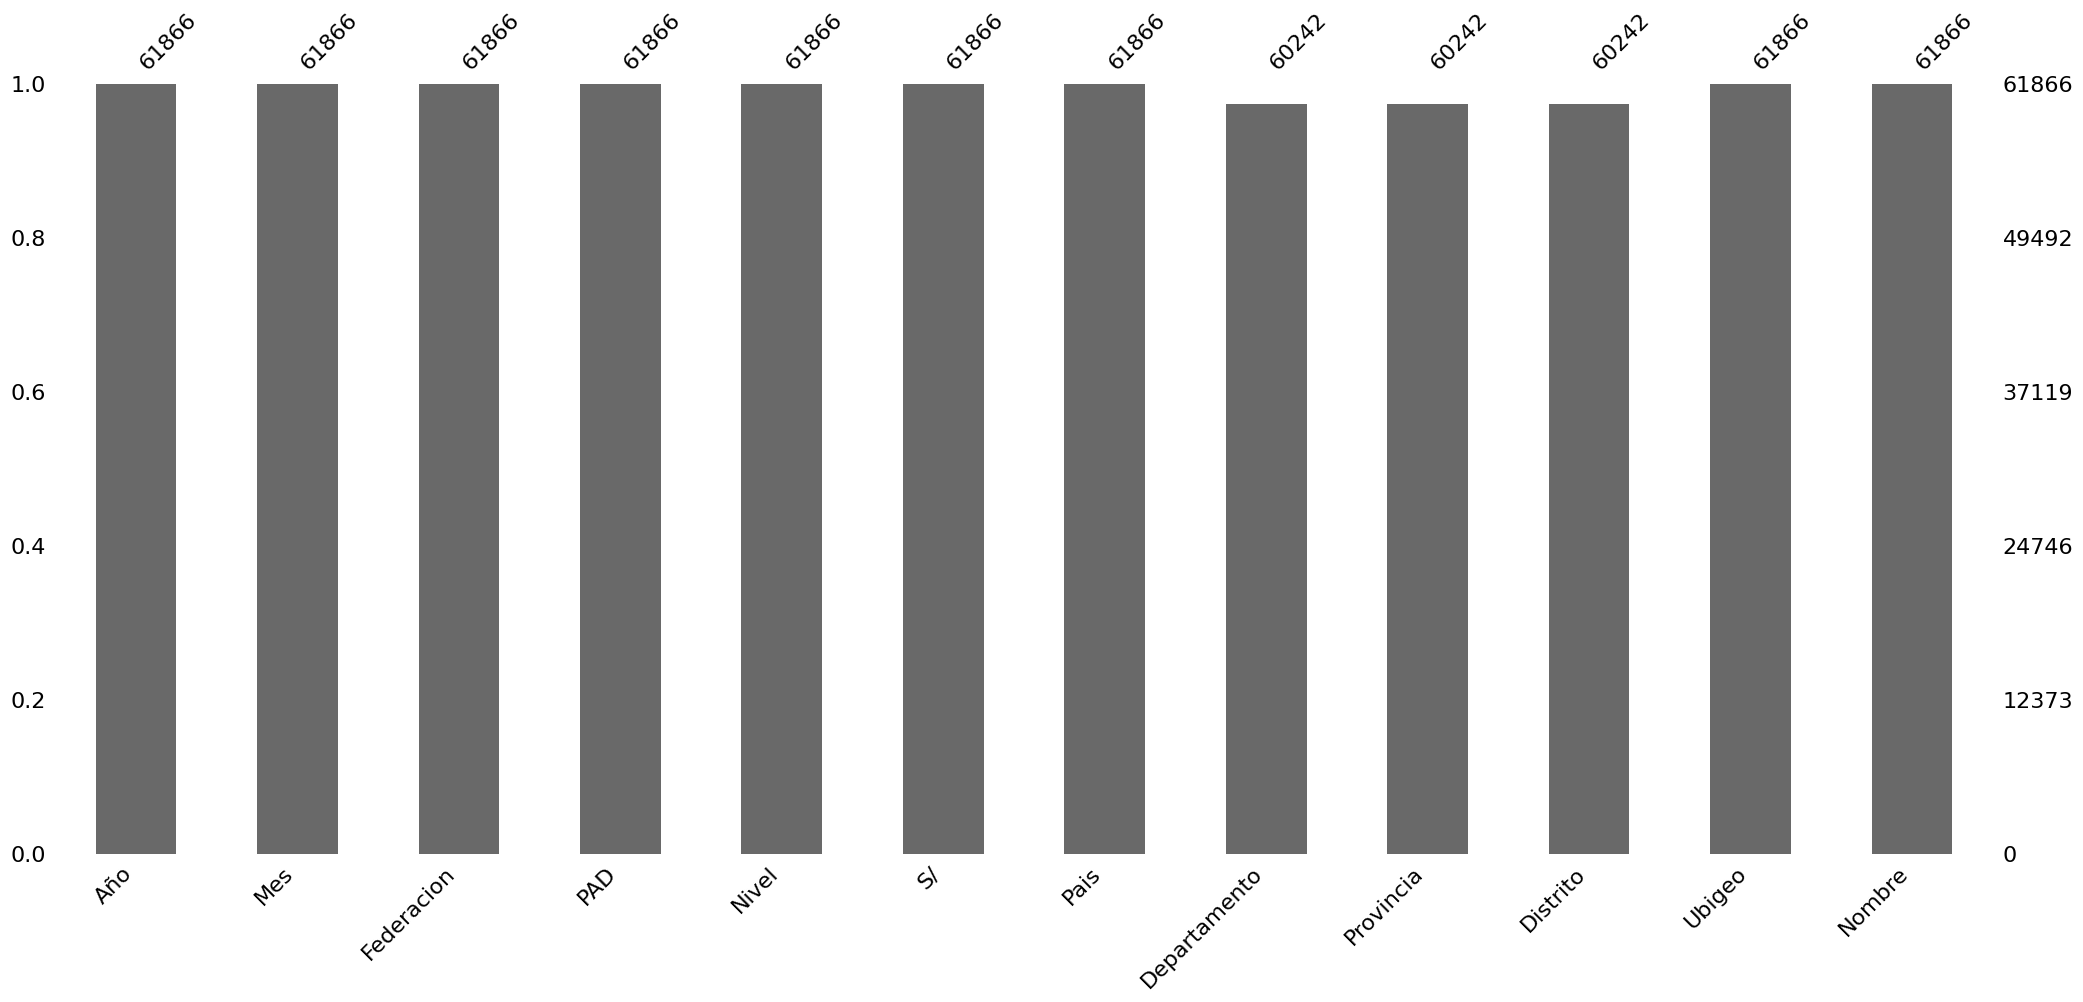

In [152]:
msno.bar(df2)

In [153]:
df2.isnull().sum()

Año                0
Mes                0
Federacion         0
PAD                0
Nivel              0
S/                 0
Pais               0
Departamento    1624
Provincia       1624
Distrito        1624
Ubigeo             0
Nombre             0
dtype: int64

* Se ha realizado una revisión del conjunto de datos y se identificó que, aunque el total esperado de registros es de 61,866 para todas las columnas, las columnas correspondientes a 'Departamento', 'Provincia' y 'Distrito' presentan una cantidad menor de datos.

* Tras consultar el diccionario de datos para comprender la discrepancia, se encontró la siguiente aclaración: Para los deportistas nacidos fuera del territorio nacional, se asigna el valor de '000000' en la columna 'UBIGEO'. Este código sirve para indicar que no se dispone de una ubicación geográfica específica dentro del país para ese deportista.
La repetición de esta explicación sugiere que es un punto importante a tener en cuenta al realizar análisis relacionados con la ubicación geográfica de los deportistas en el dataset.

**Cambiamos los valores nulos**

In [154]:
df2[['Departamento','Provincia','Distrito']] = df2[['Departamento','Provincia','Distrito']].fillna('Extranjero')

In [155]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61866 entries, 0 to 61865
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           61866 non-null  int64  
 1   Mes           61866 non-null  int32  
 2   Federacion    61866 non-null  object 
 3   PAD           61866 non-null  object 
 4   Nivel         61866 non-null  object 
 5   S/            61866 non-null  float64
 6   Pais          61866 non-null  object 
 7   Departamento  61866 non-null  object 
 8   Provincia     61866 non-null  object 
 9   Distrito      61866 non-null  object 
 10  Ubigeo        61866 non-null  int64  
 11  Nombre        61866 non-null  object 
dtypes: float64(1), int32(1), int64(2), object(8)
memory usage: 5.4+ MB


# 4. Visualización de Datos

**4.1 ¿Cuánto dinero ha sido distribuido a los deportistas en cada federación deportiva?**

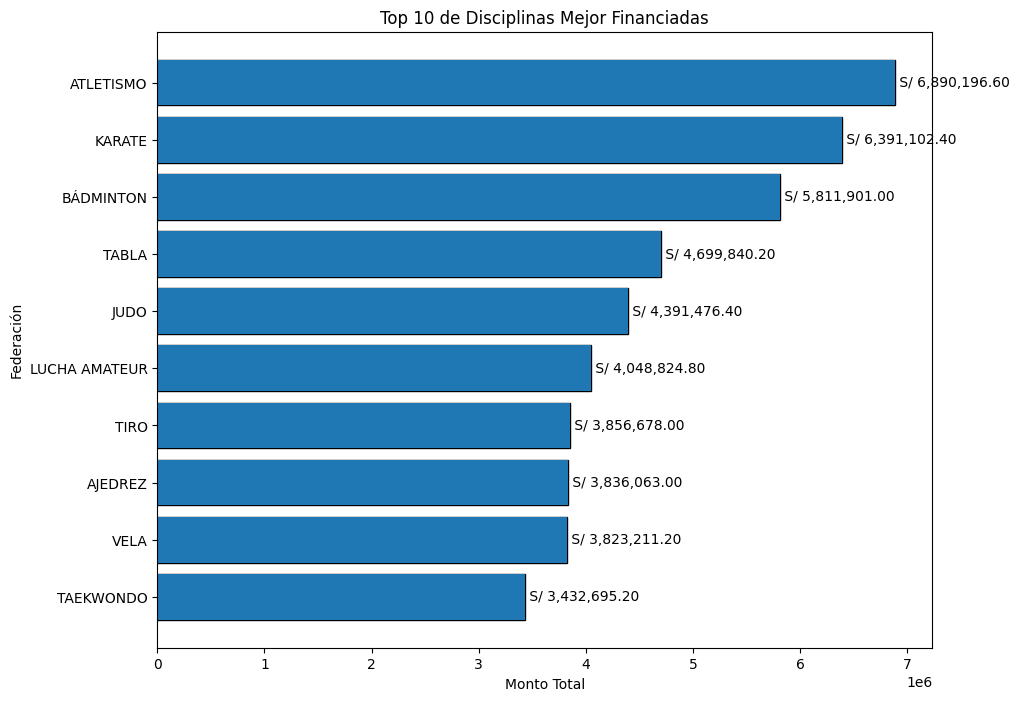

In [156]:
montos_por_federacion = df2.groupby('Federacion')['S/'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,8))

colores = plt.cm.viridis(np.linspace(0.3, 0.7, len(montos_por_federacion)))
barras = plt.barh(montos_por_federacion.index, montos_por_federacion.values, color=colores, edgecolor='black')
    

plt.barh(montos_por_federacion.index , montos_por_federacion.values)
plt.title('Top 10 de Disciplinas Mejor Financiadas')
plt.xlabel('Monto Total')
plt.ylabel('Federación')
plt.gca().invert_yaxis()

for barra in barras:
    plt.text(   
        barra.get_width(),     
        barra.get_y() + barra.get_height() / 2,
        f' S/ {barra.get_width():,.2f}',
        va='center',
        ha='left'
        )

# Mostrar el gráfico
plt.show()

In [157]:
print("Insights del Top 10 de disciplinas mejor financiadas")
print("La federación con mayor recaudacion es: ", montos_por_federacion.index[0], "con un total de S/", format(montos_por_federacion.values[0],",.2f"))
print("La diferencia entre la más y menos financiada en el top10 es de S/", format(montos_por_federacion.values[0] - montos_por_federacion.values[-1], ",.2f"))
print("El total de las disciplinas que reciben más de S/1,0000.00 es ", sum(montos_por_federacion > 1e6))

Insights del Top 10 de disciplinas mejor financiadas
La federación con mayor recaudacion es:  ATLETISMO con un total de S/ 6,890,196.60
La diferencia entre la más y menos financiada en el top10 es de S/ 3,457,501.40
El total de las disciplinas que reciben más de S/1,0000.00 es  10


**4.2 ¿Cómo han evolucionado los beneficios por año para los deportistas?**

In [158]:
df2.head()

,Año,Mes,Federacion,PAD,Nivel,S/,Pais,Departamento,Provincia,Distrito,Ubigeo,Nombre
0,2013,1,AJEDREZ,I,III,1000.0,PERU,LIMA,LIMA,JESUS MARIA,150113,INGRID YADYRA ALIAGA FERNANDEZ
1,2013,1,AJEDREZ,I,V,600.0,PERU,LIMA,LIMA,LIMA,150101,MITZY MISHEL CABALLERO QUIJANO
2,2013,1,AJEDREZ,I,III,1000.0,PERU,LIMA,LIMA,LA VICTORIA,150115,ANN LINDSAY CHUMPITAZ CARBAJAL
3,2013,1,AJEDREZ,I,V,600.0,PERU,LIMA,LIMA,VILLA EL SALVADOR,150142,KEVIN JOEL CORI QUISPE
4,2013,1,AJEDREZ,I,IV,800.0,PERU,LIMA,LIMA,LIMA,150101,CRISTHIAN ARNALDO CRUZ SANCHEZ


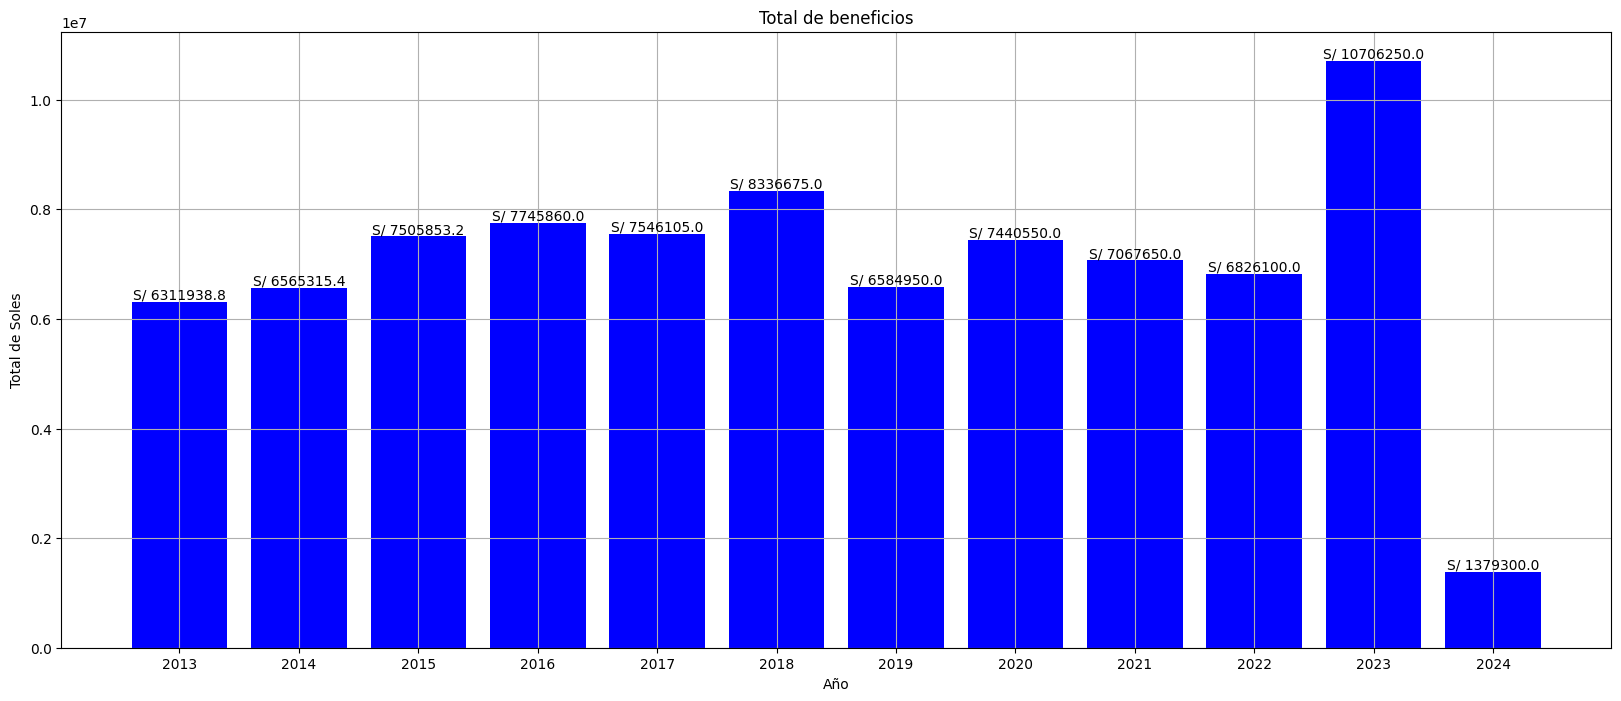

In [159]:
evolucion_beneficios = df2.groupby('Año')['S/'].sum()
plt.figure(figsize=(20, 8))
barras = plt.bar(evolucion_beneficios.index, evolucion_beneficios, color ='blue')
plt.bar(evolucion_beneficios.index,evolucion_beneficios, color ='blue')
plt.title("Total de beneficios")
plt.xlabel("Año")
plt.ylabel('Total de Soles')

# Valor de los años
for barra in barras:
    yval = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, yval, f'S/ {round(yval, 2)}',
             va='bottom', ha='center', color='black')

plt.grid(True)
plt.xticks(evolucion_beneficios.index, rotation=0)
plt.show()

In [160]:
print("El año donde más se apoyo al deporista fue el año:",evolucion_beneficios.idxmax(), "con un total de S/",evolucion_beneficios.max())
print("El año donde más se apoyo al deporista fue el año:",evolucion_beneficios.idxmin(), "con un total de S/",evolucion_beneficios.min(),"y esto se debe a que solo cuenta con", df2[df2['Año'] == 2024]['Mes'].nunique(), "meses.")
print("Se a gastado desde el año 2013 al 2024 un total de S/",evolucion_beneficios.sum(),"millones")

El año donde más se apoyo al deporista fue el año: 2023 con un total de S/ 10706250.0
El año donde más se apoyo al deporista fue el año: 2024 con un total de S/ 1379300.0 y esto se debe a que solo cuenta con 2 meses.
Se a gastado desde el año 2013 al 2024 un total de S/ 84016547.4 millones


**4.3 ¿Cuál es la distribución de beneficiarios según su ciudad o provincia de origen?**

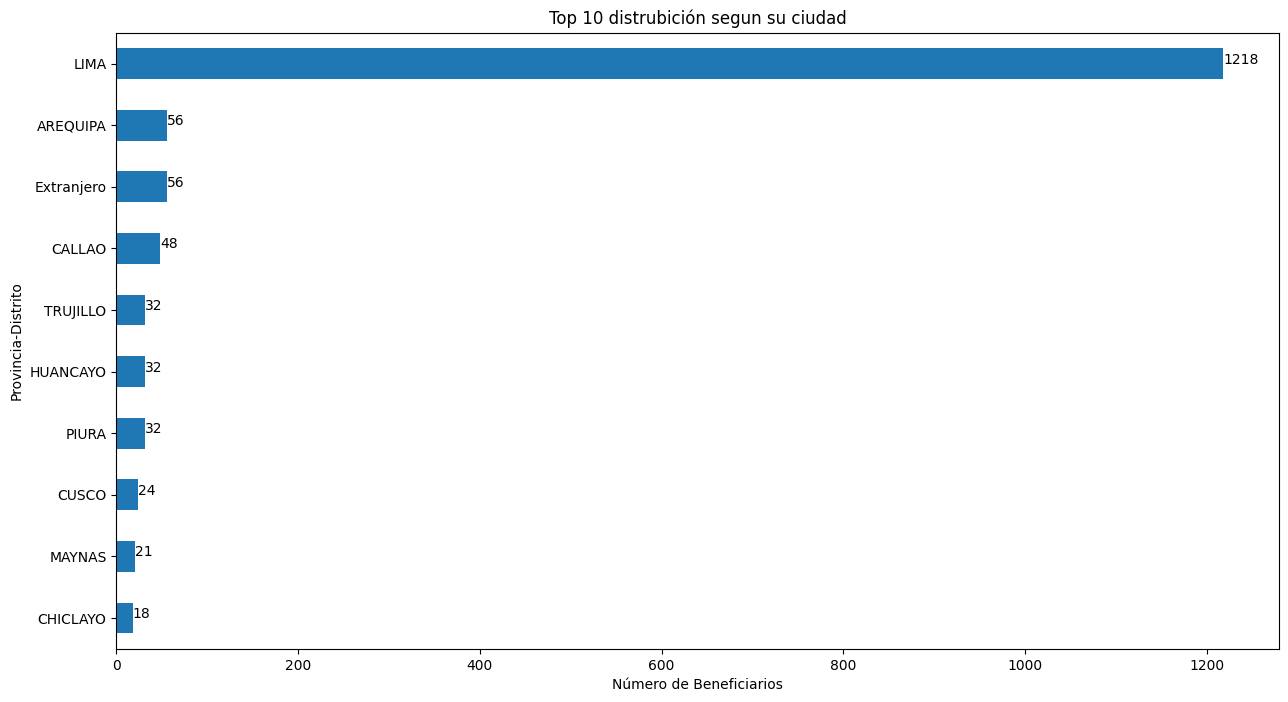

In [161]:
provincia_distrito_beneficios = df2.groupby(['Provincia'])['Nombre'].nunique().sort_values(ascending=False).head(10)
# Creamos la figura para el gráfico.
plt.figure(figsize=(15, 8))

personas = plt.barh

# Generamos el gráfico de barras horizontales.
provincia_distrito_beneficios.plot(kind='barh')

# Añadimos los títulos y etiquetas.
plt.title('Top 10 distrubición segun su ciudad')
plt.xlabel('Número de Beneficiarios')
plt.ylabel('Provincia-Distrito')

for index, value in enumerate(provincia_distrito_beneficios):
    plt.text(value,index, str(value))

# Invertimos el eje y para que las barras se muestren en orden descendente.
plt.gca().invert_yaxis()

# Mostramos el gráfico.
plt.show()


In [192]:
print("La mayoria de deportistas son de la ciudad de", provincia_distrito_beneficios.idxmax(),"con un total de", provincia_distrito_beneficios.max())
print("Se puede observar que hay un total de",provincia_distrito_beneficios['Extranjero'], "deportistas extranjeros que no nacieron en Perú")
print("Si observamos la distrubución de deportistas en Lima con un total de",provincia_distrito_beneficios.max(),"y los deportistas extranjeros alcanzan un total de",provincia_distrito_beneficios['Extranjero'],"lo que refleja una diversa comunidad atlética en Perú.")
df2_filtrado = df2[df2['Año'].between(2013, 2024)]
provincia_distrito_beneficios_total = df2_filtrado.groupby(['Provincia', 'Distrito'])['Nombre'].nunique()
print("Hay un total de :", provincia_distrito_beneficios_total.sum(), "deportistas desde el año 2013 al 2024.")

La mayoria de deportistas son de la ciudad de LIMA con un total de 1218
Se puede observar que hay un total de 56 deportistas extranjeros que no nacieron en Perú
Si observamos la distrubución de deportistas en Lima con un total de 1218 y los deportistas extranjeros alcanzan un total de 56 lo que refleja una diversa comunidad atlética en Perú.
Hay un total de : 1772 deportistas desde el año 2013 al 2024.


# 4.4 ¿Cuál es el monto promedio de beneficio por cada nivel?

**4.4.1 PAD NIVEL 1**

**Año 2013 al 2015**

In [163]:
# Variables PAD
no_2024 = df2[df2['Año'].between(2013,2015)]
filtro_pad_1 = no_2024[no_2024['PAD'] == 'I']
beneficio_nivel_1 = filtro_pad_1.groupby(['Nivel','Año',])['S/'].mean().reset_index()

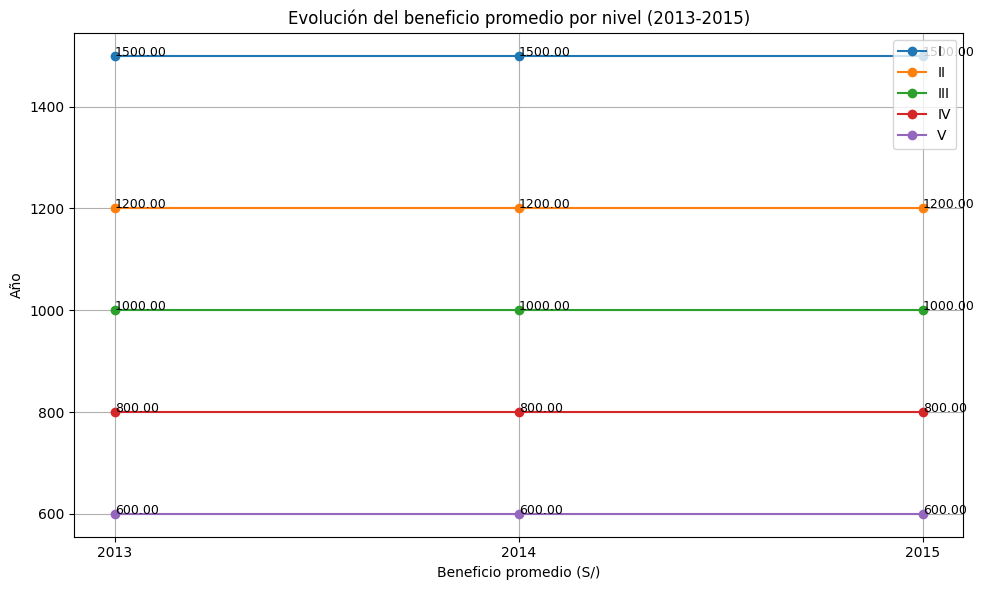

In [164]:
plt.figure(figsize=(10, 6))
for nivel in beneficio_nivel_1['Nivel'].unique():
    data = beneficio_nivel_1[beneficio_nivel_1['Nivel'] == nivel]
    plt.plot(data['Año'], data['S/'], marker='o', label=nivel)
    
    for i, txt in enumerate(data['S/']):
        plt.text(data['Año'].iloc[i], data['S/'].iloc[i], f'{txt:.2f}', fontsize=9)

# Personalizar el gráfico
# Personalizar el gráfico
plt.title('Evolución del beneficio promedio por nivel (2013-2015)')
plt.xlabel('Beneficio promedio (S/)')
plt.ylabel('Año')
plt.legend()
plt.grid(True)
plt.xticks(beneficio_nivel_1['Año'].unique())  # Asegurar que solo se muestren los años disponibles en los datos
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [165]:
# Calculando el cambio porcentual anual en el beneficio promedio para cada nivel
for nivel in beneficio_nivel_1['Nivel'].unique():
    nivel_data = beneficio_nivel_1[beneficio_nivel_1['Nivel'] == nivel]
    cambios_anuales = nivel_data['S/'].pct_change().dropna()  # Eliminar NaN para cambios porcentuales
    cambio_promedio = np.mean(cambios_anuales) * 100  # Convertir a porcentaje
    print(f"El cambio porcentual promedio anual en el beneficio para el Nivel {nivel} es {cambio_promedio:.2f}%. Este valor puede indicar {'crecimiento' if cambio_promedio > 0 else 'declive'} en los apoyos financieros para este nivel.")

# Determinar el nivel con el mayor aumento en beneficio promedio desde 2013 hasta 2015
max_aumento = beneficio_nivel_1.groupby('Nivel')['S/'].agg(lambda x: x.iloc[-1] - x.iloc[0]).idxmax()
print(f"El Nivel {max_aumento} mostró el mayor aumento en beneficio promedio entre 2013 y 2015, lo que sugiere una posible priorización o mejora en los recursos asignados a este nivel.")

# Analizar la volatilidad de los beneficios promedio a lo largo de los años
std_deviation = beneficio_nivel_1.groupby('Año')['S/'].std()
print(f"La volatilidad de los beneficios varía por año, con desviaciones estándar de {std_deviation.values}, indicando {'mayor' if np.any(std_deviation > std_deviation.mean()) else 'menor'} estabilidad en los beneficios promedio a lo largo del período.")



El cambio porcentual promedio anual en el beneficio para el Nivel I es 0.00%. Este valor puede indicar declive en los apoyos financieros para este nivel.
El cambio porcentual promedio anual en el beneficio para el Nivel II es 0.00%. Este valor puede indicar declive en los apoyos financieros para este nivel.
El cambio porcentual promedio anual en el beneficio para el Nivel III es 0.00%. Este valor puede indicar declive en los apoyos financieros para este nivel.
El cambio porcentual promedio anual en el beneficio para el Nivel IV es 0.00%. Este valor puede indicar declive en los apoyos financieros para este nivel.
El cambio porcentual promedio anual en el beneficio para el Nivel V es 0.00%. Este valor puede indicar declive en los apoyos financieros para este nivel.
El Nivel I mostró el mayor aumento en beneficio promedio entre 2013 y 2015, lo que sugiere una posible priorización o mejora en los recursos asignados a este nivel.
La volatilidad de los beneficios varía por año, con desviacio

**Año 2016 a 2018**

In [166]:
no_2024 = df2[df2['Año'].between(2016, 2018)]
filtro_pad_1 = no_2024[no_2024['PAD'] == 'I']
beneficio_nivel_2 = filtro_pad_1.groupby(['Nivel', 'Año'])['S/'].mean().reset_index()

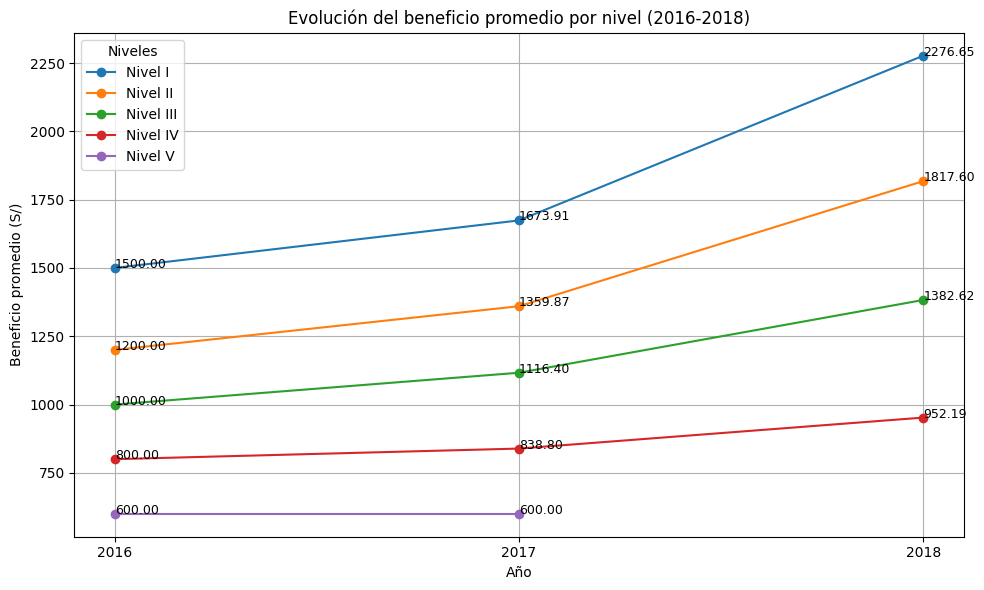

In [167]:
plt.figure(figsize=(10, 6))
for nivel in beneficio_nivel_2['Nivel'].unique():
    data = beneficio_nivel_2[beneficio_nivel_2['Nivel'] == nivel]
    plt.plot(data['Año'], data['S/'], marker='o', label=f'Nivel {nivel}')  # Agregar 'Nivel' para claridad en la leyenda
    for i, txt in enumerate(data['S/']):
        plt.text(data['Año'].iloc[i], data['S/'].iloc[i], f'{txt:.2f}', fontsize=9)  # Colocar los valores sobre cada punto

# Personalizar el gráfico
plt.title('Evolución del beneficio promedio por nivel (2016-2018)')
plt.xlabel('Año')  # Corregir el eje X
plt.ylabel('Beneficio promedio (S/)')  # Corregir el eje Y
plt.legend(title="Niveles")
plt.grid(True)
plt.xticks(beneficio_nivel_2['Año'].unique())
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [168]:
# Imprimir los resultados generales sobre el beneficio medio por nivel y año
print("Insights sobre el beneficio medio por nivel y año:")
for nivel in beneficio_nivel_2['Nivel'].unique():
    nivel_data = beneficio_nivel_2[beneficio_nivel_2['Nivel'] == nivel]
    for index, row in nivel_data.iterrows():
        print(f"En {row['Año']}, el nivel {nivel} tuvo un beneficio medio de S/ {row['S/']:.2f}.")
        
# Identificar el nivel con el mayor beneficio promedio en 2018
max_beneficio_2018 = beneficio_nivel_2[beneficio_nivel_2['Año'] == 2018]['S/'].max()
nivel_max_beneficio_2018 = beneficio_nivel_2[(beneficio_nivel_2['Año'] == 2018) & (beneficio_nivel_2['S/'] == max_beneficio_2018)]['Nivel'].values[0]
print(f"\nEl nivel con el mayor beneficio medio en 2018 fue el Nivel {nivel_max_beneficio_2018} con S/ {max_beneficio_2018:.2f}.")


Insights sobre el beneficio medio por nivel y año:
En 2016, el nivel I tuvo un beneficio medio de S/ 1500.00.
En 2017, el nivel I tuvo un beneficio medio de S/ 1673.91.
En 2018, el nivel I tuvo un beneficio medio de S/ 2276.65.
En 2016, el nivel II tuvo un beneficio medio de S/ 1200.00.
En 2017, el nivel II tuvo un beneficio medio de S/ 1359.87.
En 2018, el nivel II tuvo un beneficio medio de S/ 1817.60.
En 2016, el nivel III tuvo un beneficio medio de S/ 1000.00.
En 2017, el nivel III tuvo un beneficio medio de S/ 1116.40.
En 2018, el nivel III tuvo un beneficio medio de S/ 1382.62.
En 2016, el nivel IV tuvo un beneficio medio de S/ 800.00.
En 2017, el nivel IV tuvo un beneficio medio de S/ 838.80.
En 2018, el nivel IV tuvo un beneficio medio de S/ 952.19.
En 2016, el nivel V tuvo un beneficio medio de S/ 600.00.
En 2017, el nivel V tuvo un beneficio medio de S/ 600.00.

El nivel con el mayor beneficio medio en 2018 fue el Nivel I con S/ 2276.65.


**Año 2018 a 2023**

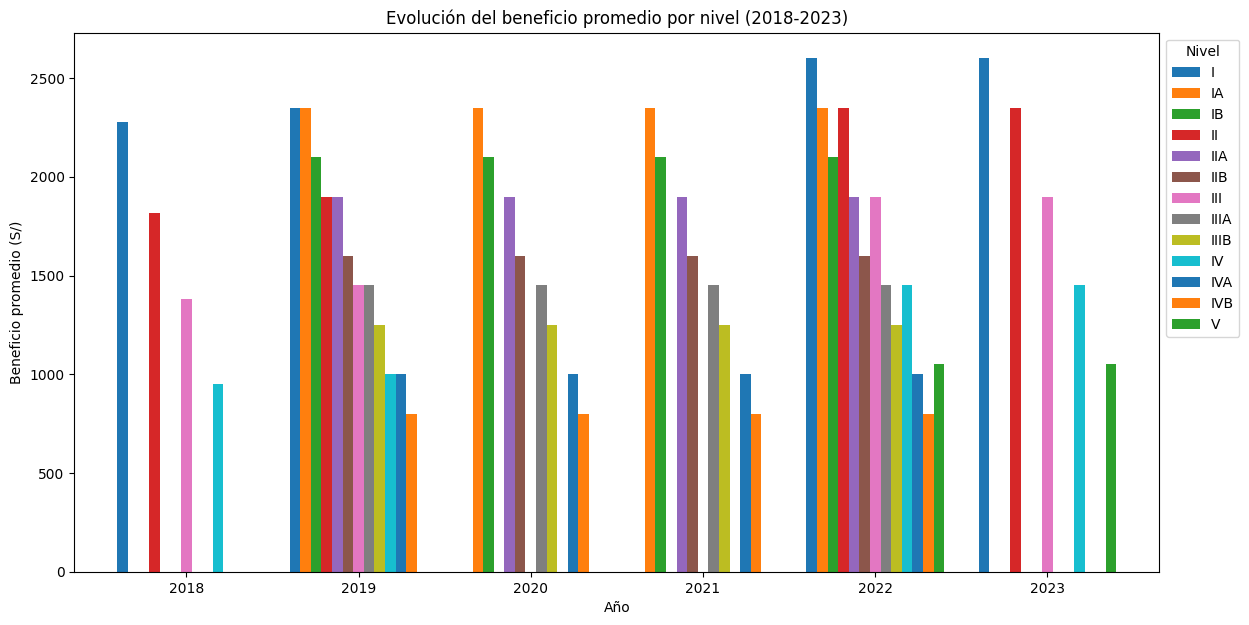

In [169]:
# Aplica las correcciones y filtros especificados por el usuario
# Asumiendo que 'Año' y 'PAD' son los nombres correctos de las columnas, y 'S/' se usa para las cantidades
filtro_pad = df2[(df2['Año'].between(2018, 2023)) & (df2['PAD'] == 'I')]

# Agrupando datos por 'Nivel' y 'Año' y calculando la media de 'S/'
beneficio_nivel = filtro_pad.groupby(['Nivel', 'Año'])['S/'].mean().reset_index()

# Pivotar los datos para el gráfico de barras agrupadas
pivot_df = beneficio_nivel.pivot(index='Año', columns='Nivel', values='S/')

# Creando el gráfico de barras agrupadas
ax = pivot_df.plot(kind='bar', figsize=(14, 7), width=0.8)
ax.set_title('Evolución del beneficio promedio por nivel (2018-2023)')
ax.set_xlabel('Año')
ax.set_ylabel('Beneficio promedio (S/)')
ax.legend(title='Nivel', bbox_to_anchor=(1.0, 1.0))
plt.xticks(rotation=0)
plt.show()

In [170]:
print("Máximos por nivel:")
print("Nivel I: Máximo: 2600 S/, Mínimo: 2277 S/")
print("Nivel IA: Máximo: 2350 S/, Mínimo: 2350 S/")
print("Nivel IB: Máximo: 2100 S/, Mínimo: 2100 S/")
print("Nivel II: Máximo: 2350 S/, Mínimo: 1818 S/")
print("Nivel IIA: Máximo: 1900 S/, Mínimo: 1900 S/")
print("Nivel IIB: Máximo: 1600 S/, Mínimo: 1600 S/")
print("Nivel III: Máximo: 1900 S/, Mínimo: 1383 S/")
print("Nivel IIIA: Máximo: 1450 S/, Mínimo: 1450 S/")
print("Nivel IIIB: Máximo: 1250 S/, Mínimo: 1250 S/")
print("Nivel IV: Máximo: 1450 S/, Mínimo: 952 S/")
print("Nivel IVA: Máximo: 1000 S/, Mínimo: 1000 S/")
print("Nivel IVB: Máximo: 800 S/, Mínimo: 800 S/")
print("Nivel V: Máximo: 1050 S/, Mínimo: 1050 S/")

print("\nMayor beneficio promedio registrado:")
print("Nivel: I, Año: 2022, Monto: 2600 S/")


Máximos por nivel:
Nivel I: Máximo: 2600 S/, Mínimo: 2277 S/
Nivel IA: Máximo: 2350 S/, Mínimo: 2350 S/
Nivel IB: Máximo: 2100 S/, Mínimo: 2100 S/
Nivel II: Máximo: 2350 S/, Mínimo: 1818 S/
Nivel IIA: Máximo: 1900 S/, Mínimo: 1900 S/
Nivel IIB: Máximo: 1600 S/, Mínimo: 1600 S/
Nivel III: Máximo: 1900 S/, Mínimo: 1383 S/
Nivel IIIA: Máximo: 1450 S/, Mínimo: 1450 S/
Nivel IIIB: Máximo: 1250 S/, Mínimo: 1250 S/
Nivel IV: Máximo: 1450 S/, Mínimo: 952 S/
Nivel IVA: Máximo: 1000 S/, Mínimo: 1000 S/
Nivel IVB: Máximo: 800 S/, Mínimo: 800 S/
Nivel V: Máximo: 1050 S/, Mínimo: 1050 S/

Mayor beneficio promedio registrado:
Nivel: I, Año: 2022, Monto: 2600 S/


# 4.1.2 PAD Nivel 2

**Año 2013 a 2015**

In [171]:
# Variables PAD
no_2024 = df2[df2['Año'].between(2013,2015)]
filtro_pad_2 = no_2024[no_2024['PAD'] == 'II']
beneficio_nivel_pad_2 = filtro_pad_2.groupby(['Nivel','Año',])['S/'].mean().reset_index()

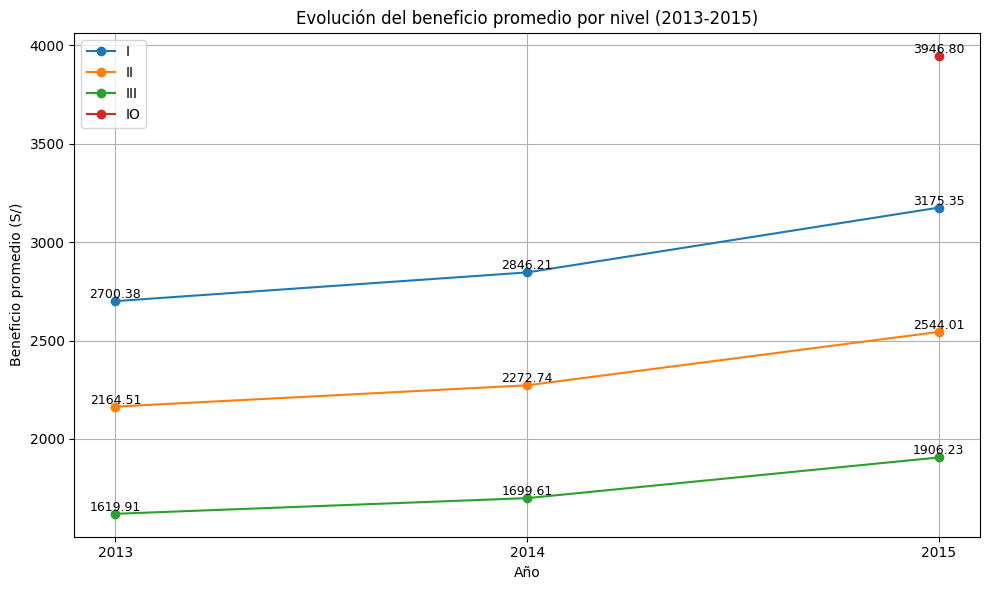

In [172]:
# Suponiendo que beneficio_nivel_pad_2 es el DataFrame correcto y ya está cargado con los datos apropiados
plt.figure(figsize=(10, 6))

for nivel in beneficio_nivel_pad_2['Nivel'].unique():
    data = beneficio_nivel_pad_2[beneficio_nivel_pad_2['Nivel'] == nivel]
    plt.plot(data['Año'], data['S/'], marker='o', label=nivel)
    
    # Añadir etiquetas de texto para cada punto de datos
    for i, txt in enumerate(data['S/']):
        plt.text(data['Año'].iloc[i], data['S/'].iloc[i], f'{txt:.2f}', fontsize=9, ha='center', va='bottom')

# Personalizar el gráfico
plt.title('Evolución del beneficio promedio por nivel (2013-2015)')  # Asumiendo que los datos cubren estos años
plt.xlabel('Año')
plt.ylabel('Beneficio promedio (S/)')

# Mejorar la legibilidad
plt.legend()
plt.grid(True)
plt.xticks(beneficio_nivel_pad_2['Año'].unique(), rotation=0)  # Rotar las etiquetas del eje x para mejor visualización
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [173]:
print("Insight de los años 2013, 2014, 2015 en el dataset:")
print("Máximo beneficio promedio registrado en el PAD 'II' entre 2013 y 2015 es de S/", beneficio_nivel_pad_2['S/'].max())
print("Se observa que hay una tendencia de aumento en el beneficio promedio para cada nivel entre 2013 y 2015.")
print("El Nivel I muestra el aumento más significativo, pasando de 2700.38 S/ en 2013 a 3946.80 S/ en 2015, lo que representa un aumento aproximado del 46%.")
print("Los Niveles II y III también muestran aumentos, aunque más moderados, con Nivel II aumentando desde 2164.51 S/ a 2544.01 S/ y Nivel III desde 1619.91 S/ a 1906.23 S/ durante el mismo período.")


Insight de los años 2013, 2014, 2015 en el dataset:
Máximo beneficio promedio registrado en el PAD 'II' entre 2013 y 2015 es de S/ 3946.8
Se observa que hay una tendencia de aumento en el beneficio promedio para cada nivel entre 2013 y 2015.
El Nivel I muestra el aumento más significativo, pasando de 2700.38 S/ en 2013 a 3946.80 S/ en 2015, lo que representa un aumento aproximado del 46%.
Los Niveles II y III también muestran aumentos, aunque más moderados, con Nivel II aumentando desde 2164.51 S/ a 2544.01 S/ y Nivel III desde 1619.91 S/ a 1906.23 S/ durante el mismo período.


**Año 2016 a 2018**

In [174]:
# Variables PAD
no_2024 = df2[df2['Año'].between(2016,2018)]
filtro_pad_2 = no_2024[no_2024['PAD'] == 'II']
beneficio_nivel_pad_3 = filtro_pad_2.groupby(['Nivel','Año',])['S/'].mean().reset_index()

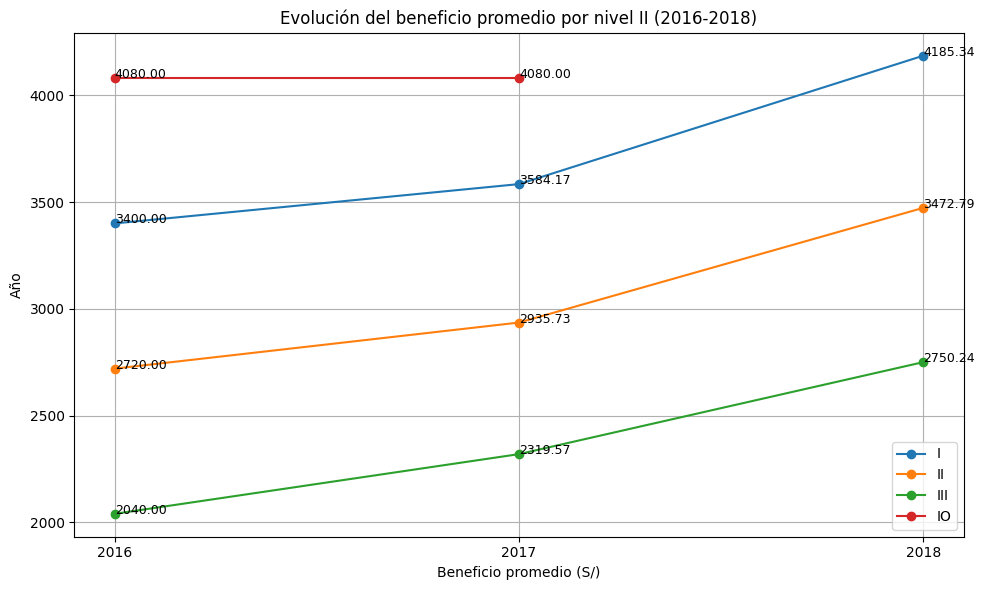

In [175]:
plt.figure(figsize=(10, 6))
for nivel in beneficio_nivel_pad_3['Nivel'].unique():
    data = beneficio_nivel_pad_3[beneficio_nivel_pad_3['Nivel'] == nivel]
    plt.plot(data['Año'], data['S/'], marker='o', label=nivel)
    
    for i, txt in enumerate(data['S/']):
        plt.text(data['Año'].iloc[i], data['S/'].iloc[i], f'{txt:.2f}', fontsize=9)

# Personalizar el gráfico
# Personalizar el gráfico
plt.title('Evolución del beneficio promedio por nivel II (2016-2018)')
plt.xlabel('Beneficio promedio (S/)')
plt.ylabel('Año')
plt.legend()
plt.grid(True)
plt.xticks(beneficio_nivel_pad_3['Año'].unique())  # Asegurar que solo se muestren los años disponibles en los datos
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [176]:
# Calcular el máximo beneficio promedio
max_beneficio = beneficio_nivel_pad_3['S/'].max().round(1)
min_beneficio = beneficio_nivel_pad_3['S/'].min()

# Imprimir los resultados
print("Máximo beneficio promedio registrado en el PAD 'II' entre 2016 y 2018: S/", max_beneficio)
print("Mínimo beneficio promedio registrado en el PAD 'II' entre 2016 y 2018: S/", min_beneficio)

# Para más detalles, podemos ver la evolución año a año por nivel
print("\nEvolución del beneficio promedio por nivel:")
for nivel in beneficio_nivel_pad_3['Nivel'].unique():
    data = beneficio_nivel_pad_3[beneficio_nivel_pad_3['Nivel'] == nivel]
    print(f"\nNivel {nivel}:")
    for index, row in data.iterrows():
        print(f"Año {row['Año']}: {row['S/']:.2f} S/")

Máximo beneficio promedio registrado en el PAD 'II' entre 2016 y 2018: S/ 4185.3
Mínimo beneficio promedio registrado en el PAD 'II' entre 2016 y 2018: S/ 2040.0

Evolución del beneficio promedio por nivel:

Nivel I:
Año 2016: 3400.00 S/
Año 2017: 3584.17 S/
Año 2018: 4185.34 S/

Nivel II:
Año 2016: 2720.00 S/
Año 2017: 2935.73 S/
Año 2018: 3472.79 S/

Nivel III:
Año 2016: 2040.00 S/
Año 2017: 2319.57 S/
Año 2018: 2750.24 S/

Nivel IO:
Año 2016: 4080.00 S/
Año 2017: 4080.00 S/


**Año 2018 a 2023**

In [177]:
# Variables PAD
no_2024 = df2[df2['Año'].between(2019,2023)]
filtro_pad_2 = no_2024[no_2024['PAD'] == 'II']
beneficio_nivel_pad_4 = filtro_pad_2.groupby(['Nivel','Año',])['S/'].mean().reset_index()

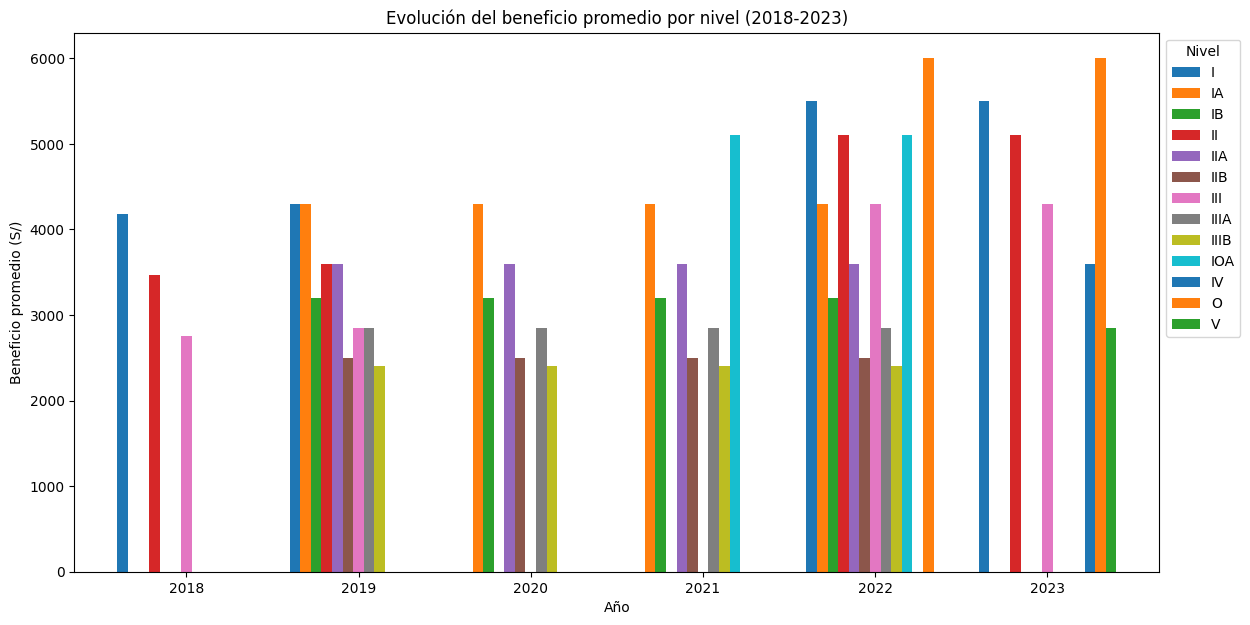

In [178]:
# Aplica las correcciones y filtros especificados por el usuario
# Asumiendo que 'Año' y 'PAD' son los nombres correctos de las columnas, y 'S/' se usa para las cantidades
filtro_pad_2 = df2[(df2['Año'].between(2018, 2023)) & (df2['PAD'] == 'II')]

# Agrupando datos por 'Nivel' y 'Año' y calculando la media de 'S/'
beneficio_nivel_pad_2 = filtro_pad_2.groupby(['Nivel', 'Año'])['S/'].mean().reset_index()

# Pivotar los datos para el gráfico de barras agrupadas
pivot_df_2 = beneficio_nivel_pad_2.pivot(index='Año', columns='Nivel', values='S/')

# Creando el gráfico de barras agrupadas
ax = pivot_df_2.plot(kind='bar', figsize=(14, 7), width=0.8)
ax.set_title('Evolución del beneficio promedio por nivel (2018-2023)')
ax.set_xlabel('Año')
ax.set_ylabel('Beneficio promedio (S/)')
ax.legend(title='Nivel', bbox_to_anchor=(1.0, 1.0))
plt.xticks(rotation=0)
plt.show()

In [179]:
# Aplica las correcciones y filtros especificados por el usuario
# Asumiendo que 'Año' y 'PAD' son los nombres correctos de las columnas, y 'S/' se usa para las cantidades
filtro_pad_2 = df2[(df2['Año'].between(2018, 2023)) & (df2['PAD'] == 'II')]

# Agrupando datos por 'Nivel' y 'Año' y calculando la media de 'S/'
beneficio_nivel_pad_2 = filtro_pad_2.groupby(['Nivel', 'Año'])['S/'].mean().reset_index()

# Calculando máximos y mínimos por nivel
maximos_por_nivel = beneficio_nivel_pad_2.groupby('Nivel')['S/'].max().round(1)
minimos_por_nivel = beneficio_nivel_pad_2.groupby('Nivel')['S/'].min().round(1)

# Imprimiendo los máximos y mínimos por nivel
print("Máximos por nivel:")
for nivel in maximos_por_nivel.index:
    print(f"Nivel {nivel}: Máximo: {maximos_por_nivel[nivel]} S/, Mínimo: {minimos_por_nivel[nivel]} S/")

# Encuentra el mayor beneficio promedio registrado
max_beneficio = beneficio_nivel_pad_2.loc[beneficio_nivel_pad_2['S/'].idxmax()]
print("\nMayor beneficio promedio registrado:")
print(f"Nivel: {max_beneficio['Nivel']}, Año: {max_beneficio['Año']}, Monto: {max_beneficio['S/']} S/")


Máximos por nivel:
Nivel I: Máximo: 5500.0 S/, Mínimo: 4185.3 S/
Nivel IA: Máximo: 4300.0 S/, Mínimo: 4300.0 S/
Nivel IB: Máximo: 3200.0 S/, Mínimo: 3200.0 S/
Nivel II: Máximo: 5100.0 S/, Mínimo: 3472.8 S/
Nivel IIA: Máximo: 3600.0 S/, Mínimo: 3600.0 S/
Nivel IIB: Máximo: 2500.0 S/, Mínimo: 2500.0 S/
Nivel III: Máximo: 4300.0 S/, Mínimo: 2750.2 S/
Nivel IIIA: Máximo: 2850.0 S/, Mínimo: 2850.0 S/
Nivel IIIB: Máximo: 2400.0 S/, Mínimo: 2400.0 S/
Nivel IOA: Máximo: 5100.0 S/, Mínimo: 5100.0 S/
Nivel IV: Máximo: 3600.0 S/, Mínimo: 3600.0 S/
Nivel O: Máximo: 6000.0 S/, Mínimo: 6000.0 S/
Nivel V: Máximo: 2850.0 S/, Mínimo: 2850.0 S/

Mayor beneficio promedio registrado:
Nivel: O, Año: 2022, Monto: 6000.0 S/


# 4.5 ¿Cuál es el monto promedio de beneficio por el nivel de PAD I , II?

**4.5.1 Pad Nivel I**

In [180]:
no_2024_1 = df2[df2['Año'].between(2013,2023)]
pad_nivel_1 = no_2024_1[no_2024_1['PAD'] == 'I']
promedio_nivel_1 = pad_nivel_1.groupby(['Nivel','Año'])['S/'].mean().reset_index()
promedio_nivel_ordenado = promedio_nivel_1.sort_values('Año')

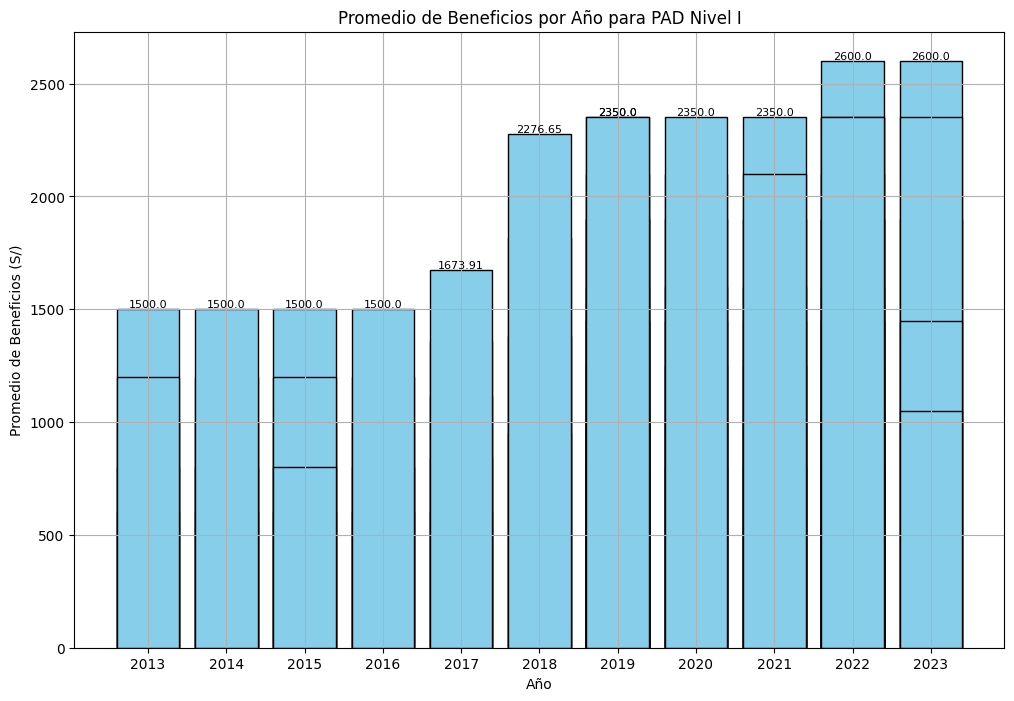

In [181]:
max_values_per_year_1 = promedio_nivel_ordenado.groupby('Año')['S/'].max()
plt.figure(figsize=(12, 8))
bars = plt.bar(promedio_nivel_ordenado['Año'].astype(str), promedio_nivel_ordenado['S/'], color='skyblue', edgecolor='black')

# Añadir etiquetas de texto solo en las barras que tienen el valor máximo por año
for bar, (index, row) in zip(bars, promedio_nivel_ordenado.iterrows()):
    yval = bar.get_height()
    # Comprobar si el valor de la barra es el máximo para ese año
    if yval == max_values_per_year_1.loc[row['Año']]:
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=8, color='black')

plt.title('Promedio de Beneficios por Año para PAD Nivel I')
plt.xlabel('Año')
plt.ylabel('Promedio de Beneficios (S/)')
plt.grid(True)
plt.xticks(rotation=0)  # Rotar las etiquetas del eje x para mejor visualización
plt.show()

In [182]:
max_por_año = promedio_nivel_ordenado.groupby('Año')['S/'].max()
min_por_año = promedio_nivel_ordenado.groupby('Año')['S/'].min()

# Aquí obtenemos los años con el máximo y mínimo valor de 'S/'
año_max = max_por_año.idxmax()
año_min = min_por_año.idxmin()

# Aquí obtenemos los valores máximos y mínimos de 'S/'
valor_max = max_por_año.max()
valor_min = min_por_año.min()

#

print("Insights de Beneficios Promedio por Año para PAD Nivel I:")
print(f"El año con el mayor beneficio promedio fue {año_max} con un valor de S/ {valor_max:.2f}.")
print(f"El año con el menor beneficio promedio fue {año_min} con un valor de S/ {valor_min:.2f}.")

#

primer_valor_año = promedio_nivel_ordenado.loc[promedio_nivel_ordenado['Año'] == promedio_nivel_ordenado['Año'].min(), 'S/'].mean()
ultimo_valor_año = promedio_nivel_ordenado.loc[promedio_nivel_ordenado['Año'] == promedio_nivel_ordenado['Año'].max(), 'S/'].mean()
incremento = ((ultimo_valor_año - primer_valor_año) / primer_valor_año) * 100
print(f"El beneficio promedio en el primer año ({promedio_nivel_ordenado['Año'].min()}) fue de S/ {primer_valor_año:.2f}, y en el último año ({promedio_nivel_ordenado['Año'].max()}) fue de S/ {ultimo_valor_año:.2f}.")
print(f"Esto representa un cambio del {incremento:.2f}% a lo largo del período analizado, indicando {'un incremento' if incremento > 0 else 'una disminución'} en los beneficios.")

Insights de Beneficios Promedio por Año para PAD Nivel I:
El año con el mayor beneficio promedio fue 2022 con un valor de S/ 2600.00.
El año con el menor beneficio promedio fue 2013 con un valor de S/ 600.00.
El beneficio promedio en el primer año (2013) fue de S/ 1020.00, y en el último año (2023) fue de S/ 1870.00.
Esto representa un cambio del 83.33% a lo largo del período analizado, indicando un incremento en los beneficios.


**4.5.2 PAD NIVEL II**

In [183]:
no_2024_1 = df2[df2['Año'].between(2013,2023)]
pad_nivel_1 = no_2024_1[no_2024_1['PAD'] == 'II']
promedio_nivel_2 = pad_nivel_1.groupby(['Nivel','Año'])['S/'].mean().reset_index()
promedio_nivel_ordenado_1= promedio_nivel_2.sort_values('Año')

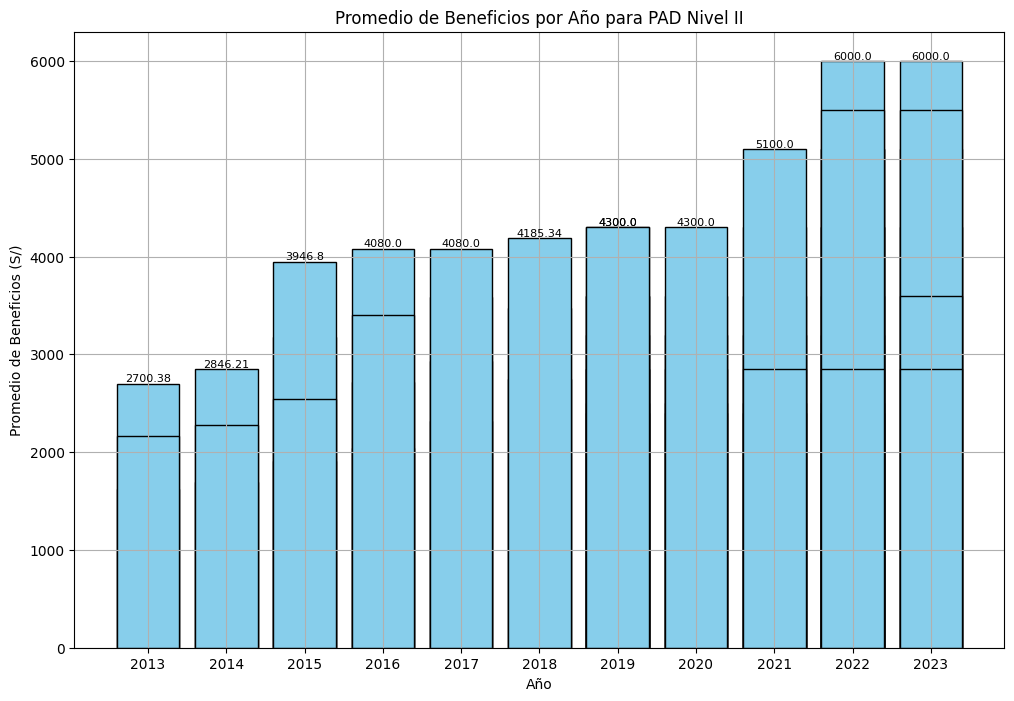

In [184]:
max_values_per_year_2 = promedio_nivel_ordenado_1.groupby('Año')['S/'].max()

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
bars = plt.bar(promedio_nivel_ordenado_1['Año'].astype(str), promedio_nivel_ordenado_1['S/'], color='skyblue', edgecolor='black')

# Añadir etiquetas de texto solo en las barras que tienen el valor máximo por año
for bar, (index, row) in zip(bars, promedio_nivel_ordenado_1.iterrows()):
    yval = bar.get_height()
    # Comprobar si el valor de la barra es el máximo para ese año
    if yval == max_values_per_year_2.loc[row['Año']]:
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=8, color='black')

plt.title('Promedio de Beneficios por Año para PAD Nivel II')
plt.xlabel('Año')
plt.ylabel('Promedio de Beneficios (S/)')
plt.grid(True)
plt.xticks(rotation=0)  # Rotar las etiquetas del eje x para mejor visualización
plt.show()

In [185]:
# Identificar el máximo general a lo largo de todos los años
max_general = max_values_per_year_2.max()
año_max_general = max_values_per_year_2.idxmax()

# Identificar el mínimo general de los máximos anuales
min_general = max_values_per_year_2.min()
año_min_general = max_values_per_year_2.idxmin()

# Imprimir insights básicos
print("Insights sobre Beneficios Promedio por Año para PAD Nivel II (2013-2023):")
print(f"El beneficio máximo más alto registrado fue de S/ {max_general:.2f} en el año {año_max_general}.")
print(f"El beneficio máximo más bajo registrado entre los máximos anuales fue de S/ {min_general:.2f} en el año {año_min_general}.")

#

min_valor = promedio_nivel_ordenado_1['S/'].min()
max_valor = promedio_nivel_ordenado_1['S/'].max()
min_año = promedio_nivel_ordenado_1[promedio_nivel_ordenado_1['S/'] == min_valor]['Año'].values[0]
max_año = promedio_nivel_ordenado_1[promedio_nivel_ordenado_1['S/'] == max_valor]['Año'].values[0]
incremento_porcentual = ((max_valor - min_valor) / min_valor) * 100 if min_valor != 0 else float('inf')  # Evitar división por cero
print(f"El incremento porcentual desde el valor mínimo al máximo fue del {incremento_porcentual:.2f}%, ocurriendo desde {min_año} hasta {max_año}.")


Insights sobre Beneficios Promedio por Año para PAD Nivel II (2013-2023):
El beneficio máximo más alto registrado fue de S/ 6000.00 en el año 2022.
El beneficio máximo más bajo registrado entre los máximos anuales fue de S/ 2700.38 en el año 2013.
El incremento porcentual desde el valor mínimo al máximo fue del 270.39%, ocurriendo desde 2013 hasta 2022.


# 4.6 ¿Quiénes son los deportistas que han recibido los montos más altos y en qué federaciones participan?

**4.6.1 PAD NIVEL I**

In [186]:
pad_1 = df2['PAD'] == 'I'
df2_pad_1 = df2[pad_1]
max_montos_pad_1 = df2_pad_1.groupby('Federacion')['S/'].max().reset_index()
# Realizar el merge con df2_pad_1 para obtener detalles completos de los deportistas que recibieron estos montos
deportistas_top_pad_1 = pd.merge(df2_pad_1, max_montos_pad_1, how='inner', on=['Federacion', 'S/'])

# Seleccionar las columnas relevantes para mostrar
result_pad_1 = deportistas_top_pad_1[['Nombre', 'Federacion', 'S/']]
valores_unicos = result_pad_1['Federacion'].nunique()


In [187]:
result_pad_1 = deportistas_top_pad_1[['Nombre', 'Federacion', 'S/']]

# Eliminar duplicados asegurando una entrada por federación con el monto máximo
# Esto seleccionará el primer deportista encontrado con el monto máximo por federación si hay duplicados
result_pad_1_unique = result_pad_1.drop_duplicates(subset=['Federacion', 'S/'])

# Ordenar los datos por el monto recibido en orden descendente y tomar los primeros 10 para el gráfico
result_pad_1_sorted = result_pad_1_unique.sort_values('S/', ascending=False)

result_pad_1_sorted.head(30)

,Nombre,Federacion,S/
2338,HUGO XAVIER DEL CASTILLO PALOMINO,TAEKWONDO,2600.0
2337,NILTON GONZALO MARCOS SOTO GARCIA,LUCHA AMATEUR,2600.0
2333,ALONSO RAFAEL ESCUDERO ROMAN,SQUASH RACKET,2600.0
2324,LUIS DAVID BARDALEZ TUISIMA,LEVANTAMIENTO DE PESAS,2600.0
2321,CAMILA MAYTHE FIGUEROA AQUINO,JUDO,2600.0
2305,CARLOS ENRIQUE FELIPA CORDOVA,ANPPERÚ,2600.0
2301,CRISTIAN JAIME MORALES BUSTOS,TIRO,2600.0
2297,VANIA LIANA TORRES OLIVIERI,TABLA,2600.0
2286,ERIBERTO GUTIERREZ ROBLES,CANOTAJE,2600.0
2259,INES LUCIA CASTILLO SALAZAR,BÁDMINTON,2600.0


In [188]:
print("Insights sobre los Beneficios Máximos por Año para PAD Nivel I:")
print("Total de federaciones unicas representadas", valores_unicos)
print("\nTop 10 deportistas con los mayores montos recibidos:")
top_10 = result_pad_1_sorted.head(5)
for index, row in top_10.iterrows():
    print(f"{index+1}. {row['Nombre']}, Federación: {row['Federacion']}, Monto: S/ {row['S/']:.2f}")


Insights sobre los Beneficios Máximos por Año para PAD Nivel I:
Total de federaciones unicas representadas 54

Top 10 deportistas con los mayores montos recibidos:
2339. HUGO XAVIER DEL CASTILLO PALOMINO, Federación: TAEKWONDO, Monto: S/ 2600.00
2338. NILTON GONZALO MARCOS SOTO GARCIA, Federación: LUCHA AMATEUR, Monto: S/ 2600.00
2334. ALONSO RAFAEL ESCUDERO ROMAN, Federación: SQUASH RACKET, Monto: S/ 2600.00
2325. LUIS DAVID BARDALEZ TUISIMA, Federación: LEVANTAMIENTO DE PESAS, Monto: S/ 2600.00
2322. CAMILA MAYTHE FIGUEROA AQUINO, Federación: JUDO, Monto: S/ 2600.00


**4.6.2 PAD NIVEL II**

In [189]:
pad_2 = df2['PAD'] == 'II'
df2_pad_2 = df2[pad_2]
max_montos_pad_2 = df2_pad_2.groupby('Federacion')['S/'].max().reset_index()
# Realizar el merge con df2_pad_1 para obtener detalles completos de los deportistas que recibieron estos montos
deportistas_top_pad_2 = pd.merge(df2_pad_2, max_montos_pad_2, how='inner', on=['Federacion', 'S/'])

# Seleccionar las columnas relevantes para mostrar
result_pad_2 = deportistas_top_pad_2[['Nombre', 'Federacion', 'S/']]
valores_unicos_2 = result_pad_2['Federacion'].nunique()

In [190]:
result_pad_2 = deportistas_top_pad_2[['Nombre', 'Federacion', 'S/']]

# Eliminar duplicados asegurando una entrada por federación con el monto máximo
# Esto seleccionará el primer deportista encontrado con el monto máximo por federación si hay duplicados
result_pad_2_unique = result_pad_2.drop_duplicates(subset=['Federacion', 'S/'])

# Ordenar los datos por el monto recibido en orden descendente y tomar los primeros 10 para el gráfico
result_pad_2_sorted = result_pad_2_unique.sort_values('S/', ascending=False)

result_pad_2_sorted.head(30)

,Nombre,Federacion,S/
513,LEONOR ANGELICA ESPINOZA CARRANZA,TAEKWONDO,6000.0
549,JEAN PAUL DE TRAZEGNIES VALDEZ,VELA,5500.0
497,ALEXANDRA VANESSA GRANDE RISCO,KARATE,5500.0
573,PILAR JAUREGUI CANCINO,BÁDMINTON,5500.0
465,GABRIELA KIMBERLY GARCIA LEON,ATLETISMO,5500.0
569,LUCCA MESINAS NOVARO,TABLA,5100.0
529,NICOLAS RODOLFO PACHECO ESPINOSA,TIRO,5100.0
450,ANGELO GIOVANNI CARO NARVAEZ,PATINAJE,4300.0
442,JUAN MIGUEL POSTIGOS ACUÑA,JUDO,4300.0
434,ROYNER GROVER NAVARRO CALLE,CICLISMO,4300.0


In [191]:
print("Insights sobre los Beneficios Máximos por Año para PAD Nivel II:")
print("Total de federaciones unicas representadas", valores_unicos)
print("\nTop 10 deportistas con los mayores montos recibidos:")
top_10 = result_pad_2_sorted.head(5)
for index, row in top_10.iterrows():
    print(f"{index+1}. {row['Nombre']}, Federación: {row['Federacion']}, Monto: S/ {row['S/']:.2f}")

Insights sobre los Beneficios Máximos por Año para PAD Nivel II:
Total de federaciones unicas representadas 54

Top 10 deportistas con los mayores montos recibidos:
514. LEONOR ANGELICA ESPINOZA CARRANZA, Federación: TAEKWONDO, Monto: S/ 6000.00
550. JEAN PAUL DE TRAZEGNIES VALDEZ, Federación: VELA, Monto: S/ 5500.00
498. ALEXANDRA VANESSA GRANDE RISCO, Federación: KARATE, Monto: S/ 5500.00
574. PILAR JAUREGUI CANCINO, Federación: BÁDMINTON, Monto: S/ 5500.00
466. GABRIELA KIMBERLY GARCIA LEON, Federación: ATLETISMO, Monto: S/ 5500.00
